# Instruction: Data Preprocessing and Visualization

(Lisa Mannel)

## Data Preprocessing

In previous weeks we have already seen several data preprocessing methods. Recall, for example, the third instruction  on data exploration, basic visualization and decison trees or the instruction session on regression in instruction 4. We learned preprocessing steps such as

* One-hot encoding
* Outlier detection
* Handling missing values
* etc.

Today we will see a few more techniques. However, note that there are many possiblities to achieve your preprocessing goals in Python and also this instruction just shows a subset of those.

### Missing values

To illustrate the handling of missing values we will use a running example based on the *diabetes data set*. The data set has the following attributes:

* 0: Number of times pregnant
* 1: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* 2: Diastolic blood pressure (mm Hg)
* 3: Triceps skinfold thickness (mm)
* 4: 2-Hour serum insulin (mu U/ml)
* 5: Body mass index (weight in kg/(height in m)^2)
* 6: Diabetes pedigree function
* 7: Age (years)
* 8: Class variable (0 or 1)

Let's first import the data set and use the *describe()* method to print a statistic summary on the data set.

In [1]:
from pandas import read_csv
dataset = read_csv('pima-indians-diabetes.csv', header=None)
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

This summary can already help us to identify missing values. Recall from the lecture, not all missing values will be denoted as NaN. From the summary we can see that several attributes have a minimum value of 0. From this, combined with domain knowledge, we can conclude that for several attributes the '0' value represents a missing value.
These attributes are:

* 1: Plasma glucose concentration
* 2: Diastolic blood pressure
* 3: Triceps skinfold thickness
* 4: 2-Hour serum insulin
* 5: Body mass index

We are interested in how many of these missing values we have per attribute.

In [2]:
print((dataset[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


The different numbers of missing values indicate the need for different strategies on handling missing data. 

First of all we are going to transform our data, such that the invalid 0 values are actually represented as NaN. This is convenient because NaN values are ignored by functions such as sum or count.

In [3]:
import numpy
#replace 0 values by NaN values
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
#count the number of NaN values to see whether we replaced all required values
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


#### Remove data entries with missing values
The simplest strategie to handle missing values is simply deleting all records that contain missing values. Pandas provides a simple function to do so.

In [4]:
# count the number of rows and columns of the original dataset
print(dataset.shape)
# drop rows with missing values
dataset.dropna(inplace=True)
# count the number of rows and columns left in the dataset
print(dataset.shape)

(768, 9)
(392, 9)


#### Impute missing values
Simply removing all data entries that contain missing values reduces the data set significantly. This way we might loose valuable information important when training models on the data set (e.g. regression models, decision trees etc.). Therefore, we need other methods:

* Filling in a constant value obtained through domain knowledge
* A value from another randomly selected record
* Mean / median / mode value of the attribute
* A value estimated by another predictive model

We can use the function *fillna()* from the pandas package to fill our missing values. The first argument of the function specifies the value that should replace the missing values. In the example below we use the mean of each column.

In [5]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Alternatively we can also use the *Imputer* provided by the *sklearn.impute* package. The example below demonstrates its usage. 

In [6]:
from sklearn.impute import SimpleImputer
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)

imputer = SimpleImputer(missing_values=numpy.NaN, strategy = "mean")
transformed_values = imputer.fit_transform(dataset)

print(numpy.isnan(transformed_values).sum())

0


# Your turn!
Handling missing values should have an effect on the quality of our trained models. To show this, take the *class-grades dataset* and train two different linear regression models to predict the final grade. Compare their accuracy scores.

* Model 1 should be trained on a data set with the missing values deleted.
* Model 2 should be trained on a data set with the missing values replaced by the mean of the attribute values.

In [7]:
# solution


### Scaling / Normalization / Standardization

The terms scaling, normalization and standardization are often used interchangeably. Most often normalization aims to rescale values into a certain range (e.g. [0,1]) and standardization rescales data to have a mean of 0 and a standard deviation of 1. **Note, that the sklearn.preprocessing package has chosen the general term "scaling" for both, normalization and standardization operations.**

In general, aside from the name of a function, it is important to know how it transforms your data and whether that is what you are aiming to achieve.

We take a closer look at the theory behind some of the scaling approaches in the Pen & Paper part of this instruction. Here, we focus on how to apply scaling to data in Python.


#### Scaling attributes to a range
The *MinMaxScaler* transforms each feature to a given range (default: [0,1]).

In [8]:
from sklearn import preprocessing
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])

#creating the scaler
min_max_scaler = preprocessing.MinMaxScaler() 
#fitting the scaler to the data
min_max_scaler.fit(data)
#printing some information on the fittet scaler
print('The minimum value of each feature: ')
print(min_max_scaler.data_min_)
print('The maximum value of each feature: ')
print(min_max_scaler.data_max_)
print('The current range of each feature: ')
print(min_max_scaler.data_range_)
print(' ')


#transforming the data to the defined new range
transformed_data = min_max_scaler.transform(data)
print('The rescaled data: ')
print(transformed_data)

#We can also transform data other than the ones used to fit the scaler
print(min_max_scaler.transform([[2,2,2]]))

The minimum value of each feature: 
[ 0. -1. -1.]
The maximum value of each feature: 
[2. 1. 2.]
The current range of each feature: 
[2. 2. 3.]
 
The rescaled data: 
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
[[1.  1.5 1. ]]


The *MaxAbsScaler* scales each attribute such that the maximum absolute value of each feature in the training set will be 1.0. It's functions are similar to the MinMaxScaler.

In [9]:
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])

#creating the scaler
max_abs_scaler = preprocessing.MaxAbsScaler() 
max_abs_scaler.fit(data)

#transforming the data to the defined new range
transformed_data = max_abs_scaler.transform(data)
print('The rescaled data: ')
print(transformed_data)

print('Other data transformed by the same rescaler: ')
#We can also transform data other than the ones used to fit the scaler
print(max_abs_scaler.transform([[2,2,2]]))

The rescaled data: 
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
Other data transformed by the same rescaler: 
[[1. 2. 1.]]


#### Scaling to have a mean of 0 and standard deviation of 1

For many algorithms problems arise if a feature has a variance which is significantly larger than the variance of other features. It might dominate the objective function and make the estimator unable to learn from other features correctly as expected. To solve this problem, we can transform our data using the *scale* function provided by the *sklearn.preprocessing* package.


In [10]:
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])
scaled_data = preprocessing.scale(data)
print('The scaled data: ')
print(scaled_data)
print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))

The scaled data: 
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[0. 0. 0.]
[1. 1. 1.]


# Your turn!
Scaling data can have an effect on the quality of our trained models. To illustrate this, take the *wine dataset* provided by sklearn datasets and train three different logistic regression models predicting the target. Compare their accuracy scores.

* Model 1 should be trained on the original data set.
* Model 2 should be trained on a data set scaled using the MinMaxScaler with range [0,1].
* Model 3 should be trained on a data set scaled to the attributes having a mean of 0 and a standard deviation of 1.

In [11]:
# solution


### Discretization / Binning
Discretization provides a way to partition continuous features into discrete values. Various algorithms and approaches exist to achieve this. 

Here, we introduce the KBinsDiscretizer, which discretizes the features into bins according to several paramters. 

By default, each feature is split into 5 bins. This can be configured with *n_bins* parameter. The parameter can be set using an integer (used for all features) or an array (different values for each feature possible).

By default, the output is one-hot encoded. This can be configured with the *encode* parameter:

* Onehot: Encodes the results with one-hot encoding and returns a sparse matrix.
* Onehot-dense: Encodes the results with one-hot encoding and returns a dense array.
* Ordinal: returns the bin identifier encoded as an integer value.

By default, the data is split into bins with equal number of data points. This can be configured with the *strategy* parameter:

* Uniform: All bins in each feature have identical width.
* Quantile: All bins in each feature have the same number of points.
* kmeans: Values in each bin have the same nearest center of 1D k-means cluster.

Below you can find example code for applying the KBinsDiscretizer.

In [12]:
data = numpy.array([[ -3., 5., 15 ],[  0., 6., 14 ],[  6., 3., 11 ]])
discretizer = preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode='ordinal', strategy = 'uniform')
discretizer.fit(data)
discretized_data = discretizer.transform(data)
print('The discretized data:')
print(discretized_data)

print('The edges of each bin per feature:')
#displaying the edges of each bin per feature
print(discretizer.bin_edges_[0])
print(discretizer.bin_edges_[1])
print(discretizer.bin_edges_[2])

print('The number of bins per feature:')
#displaying the number of bins per feature (if bins are too small they can be deleted with a warning)
print(discretizer.n_bins_[0])
print(discretizer.n_bins_[1])
print(discretizer.n_bins_[2])

The discretized data:
[[0. 1. 1.]
 [1. 1. 1.]
 [2. 0. 0.]]
The edges of each bin per feature:
[-3.  0.  3.  6.]
[3.  4.5 6. ]
[11. 13. 15.]
The number of bins per feature:
3
2
2


### Your turn!
Apply the KBinsDiscretizer on the data given below. The number of bins for each feature should be equal to the range of that feature. Use the encoding *onehot-dense* and choose the strategy such that all bins contains the same number of data points.
Print the discretized data as well as the bin boundaries for each feature.

In [13]:
# solution


# Advanced visualizations
Recall basic visualization techniques from instruction session 2, such as box plots, bar charts etc. Here, we will work with more advanced techniques.

The following section shows an extract of the multitude of visualization possibilities. Python provides the advantage that many plots can be created with a few simple lines of code. 

In the following we will show some vizualizations as introduced in the lecture.

## Scatter Matrix

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# we use the iris dataset
import seaborn as sns
data = sns.load_dataset('iris')

# Make the plot
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

<Figure size 600x600 with 16 Axes>

## Parallel Coordinate plot

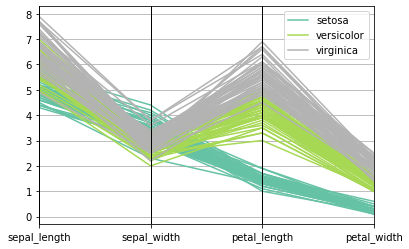

In [15]:
from pandas.plotting import parallel_coordinates
# we use the iris dataset again

# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

## Streamgraph
To visualize a streamgraph in Python we can make use of stackplots from the *matplotlib* package. Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another.

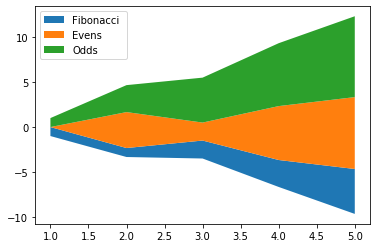

In [16]:
# the values for our x-axis
x = [1, 2, 3, 4, 5]
# the values that will be stacked on top of each other
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

# the labels for y1, y2 and y3
labels = ["Fibonacci ", "Evens", "Odds"]

#stacking our values vertically
y = numpy.vstack([y1, y2, y3])

fig, ax = plt.subplots()
#modifying the axis
ax.stackplot(x, y1, y2, y3, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()

## Heatmap
We use the heatmap function from the *seaborn package* to create a heatmap. Note, we have to aggregate/pivot our data into the correct shape before the heatmap can be created.

Long-format:
     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         1

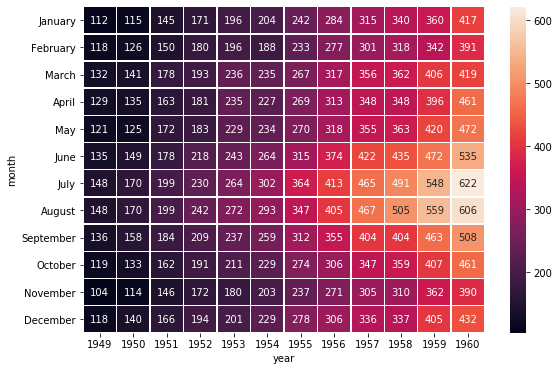

In [17]:
# Load the example flights dataset
# The example flights dataset is in long-format.
flights_long = sns.load_dataset("flights")
#In long-format, each data row can be interpreted individually. In this example each row contains a value for *year*, *month* 
#and *passengers*.
print('Long-format:')
print(flights_long) 
print(' ')

# We have to convert the data to wide-format to be able to use it for the heatmap.
#In wide-form, the values correspond to a combination of the *row category* and the *column category*. 
#When transforming from long-format to wide-format, categorical data will be grouped. In this example, 
#the wide-format displays the number of passangers for all combinations of *month* and *year*.
# Since there is only one value per month and year, we do not have aggregate our data in this example.
print('Wide-format:')
flights_wide = flights_long.pivot("month", "year", "passengers")
print(flights_wide)

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights_wide, annot=True, fmt="d", linewidths=.5, ax=ax)

# Your turn!
In real-life no one is going to tell you which visualization technique to use for which data! 
Pretend that you are a data scientist who was just provided with the datasets used in this instruction session. Visualize the data using the previously presented techniques and/or other suitable techniques provided by the matplotlib (https://matplotlib.org/gallery/index.html) and the seaborn packages (https://seaborn.pydata.org/examples/index.html). Decide by yourself which part of the data you want to visualize using which plot.